# Game Length & Release Trends (HowLongToBeat Dataset)

This notebook explores how video games have changed over time — how often they were released and how long they typically took to complete.

---

## Key Findings

- The number of game releases started to grow rapidly in the late 2000s.
- The peak occurred around 2017–2019.
- After 2020, there is a sharp drop in the data — most likely due to incomplete records for recent titles.
- Average playtime increased until the mid-2010s, then started to decline:
  - Main story durations became shorter
  - Full completion times also decreased

---

## Methodology

- Rows without release dates or playtime data were removed
- Years with insufficient data (fewer than 10 games) were excluded
- Year-by-year trends were plotted using Pandas and Seaborn


In [37]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load dataset
path = '/kaggle/input/how-long-to-beat-video-game-playtime-dataset/hltb_dataset_filtered.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

,id,name,type,release_date,release_precision,release_year,release_month,release_day,main_story_polled,main_story,main_plus_sides_polled,main_plus_sides,completionist_polled,completionist,all_styles_polled,all_styles,single_player_polled,single_player,co_op_polled,co_op,versus_polled,versus
0,1,688(I) Hunter/Killer,game,1997-07-04,day,1997.0,7.0,4.0,7.0,10.62,5.0,35.37,2.0,15.83,14.0,20.20,7.0,10.62,NaN,NaN,NaN,NaN
1,18,'Splosion Man,game,2009-07-22,day,2009.0,7.0,22.0,32.0,7.60,21.0,9.23,7.0,18.77,60.0,9.47,32.0,7.60,NaN,NaN,NaN,NaN
2,19,.hack//G.U. Vol. 1: Rebirth,game,2006-10-24,day,2006.0,10.0,24.0,75.0,18.95,78.0,24.50,25.0,37.40,178.0,23.97,75.0,18.95,NaN,NaN,NaN,NaN
3,20,.hack//G.U. Vol. 2: Reminisce,game,2007-05-08,day,2007.0,5.0,8.0,41.0,19.65,31.0,31.73,16.0,48.12,88.0,29.08,41.0,19.65,NaN,NaN,NaN,NaN
4,21,.hack//G.U. Vol. 3: Redemption,game,2008-03-25,day,2008.0,3.0,25.0,34.0,21.25,27.0,30.85,8.0,46.08,69.0,27.88,34.0,21.25,NaN,NaN,NaN,NaN


In [49]:
# Convert release_year to integer and remove rows with missing year
df = df[pd.notnull(df['release_year'])]
df['release_year'] = df['release_year'].astype(int)

# Keep only rows with at least one playtime value
df_filtered = df[
    df['main_story'].notnull() |
    df['main_plus_sides'].notnull() |
    df['completionist'].notnull()
]

# Filter out years with fewer than 10 games
counts = df_filtered.groupby('release_year').size()
valid_years = counts[counts >= 10].index

df.shape

(49964, 22)

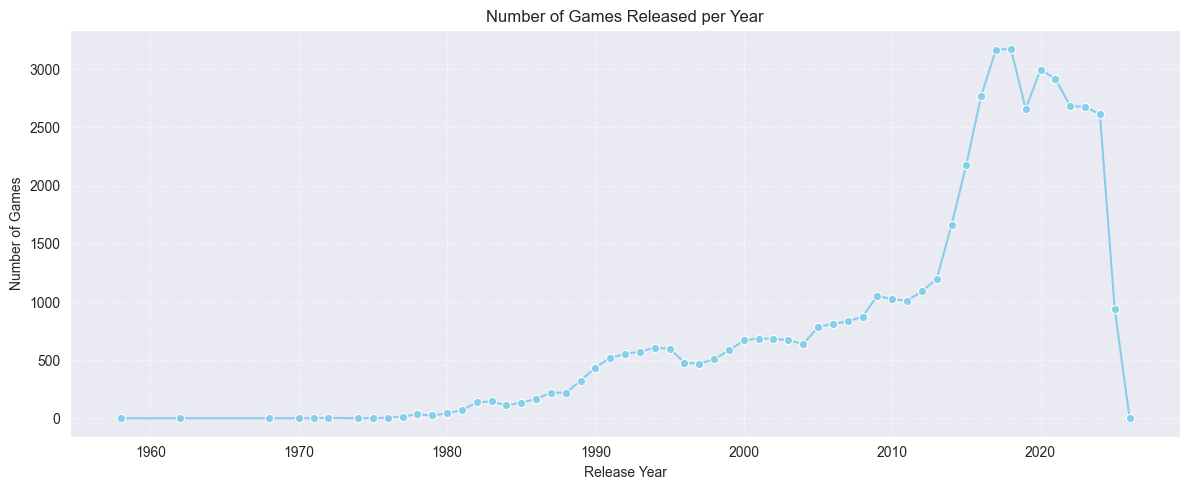

In [51]:
# Number of games released per year
yearly_counts = df_filtered.groupby('release_year').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [44]:
# Prepare yearly averages by playstyle (only for valid years)
grouped = df_filtered[df_filtered['release_year'].isin(valid_years)].groupby('release_year')

main_story = grouped['main_story'].mean()
main_plus = grouped['main_plus_sides'].mean()
completionist = grouped['completionist'].mean()

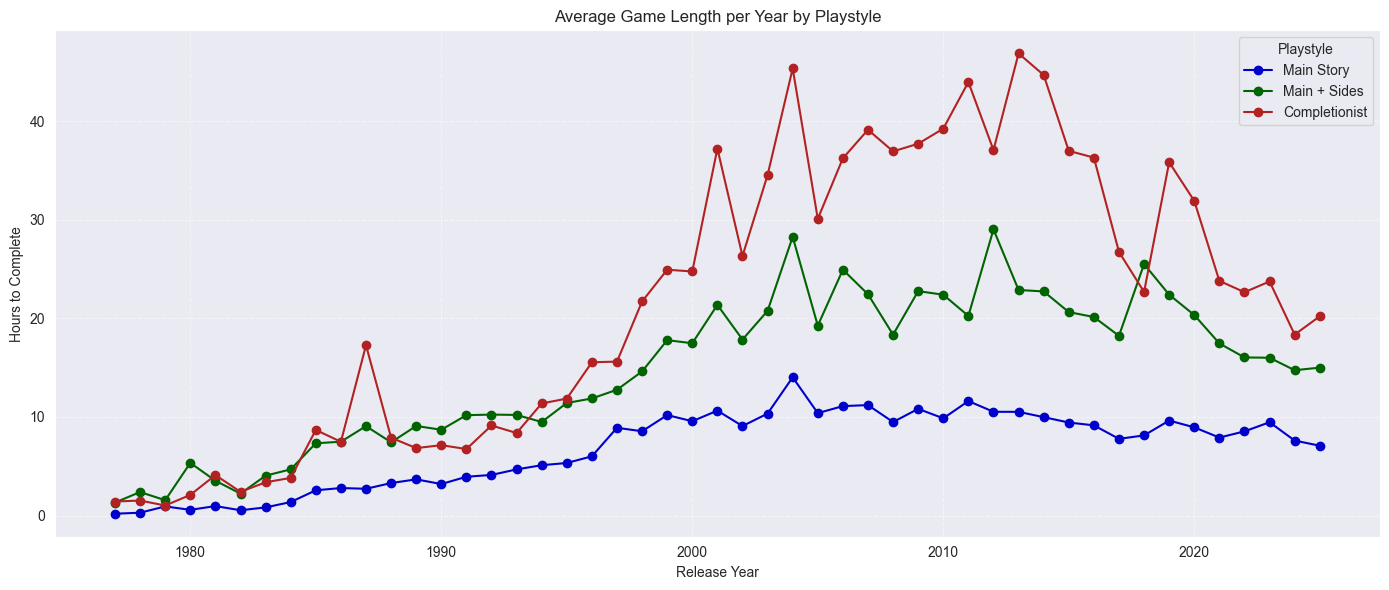

In [45]:
# Plot average game length by playstyle
plt.figure(figsize=(14, 6))
plt.plot(main_story.index, main_story.values, marker='o', label='Main Story', color='mediumblue')
plt.plot(main_plus.index, main_plus.values, marker='o', label='Main + Sides', color='darkgreen')
plt.plot(completionist.index, completionist.values, marker='o', label='Completionist', color='firebrick')

plt.title('Average Game Length per Year by Playstyle')
plt.xlabel('Release Year')
plt.ylabel('Hours to Complete')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Playstyle')
plt.tight_layout()
plt.show()

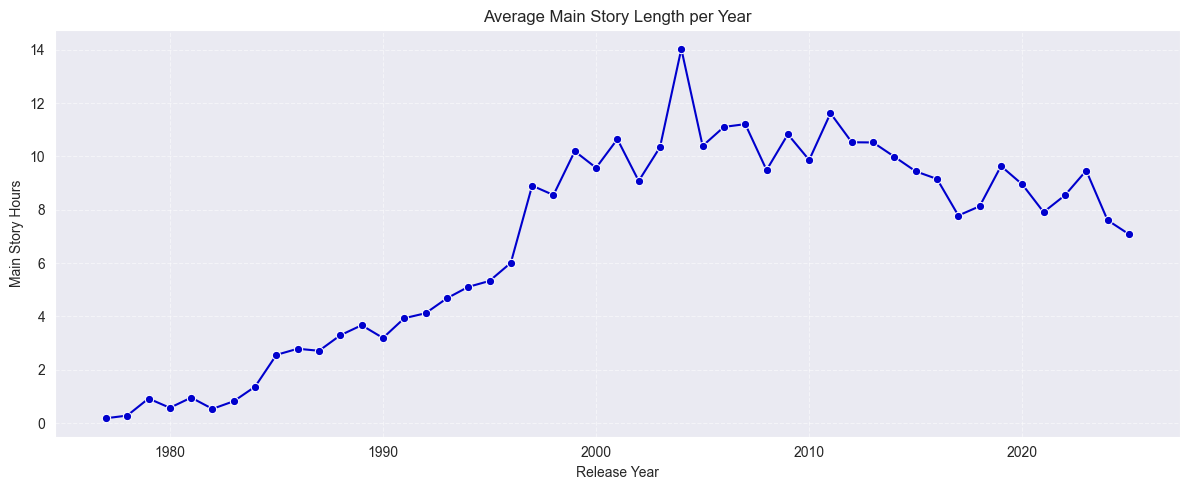

In [46]:
main_story = df_filtered[df_filtered['release_year'].isin(valid_years)].groupby('release_year')['main_story'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=main_story.index, y=main_story.values, marker='o', color='mediumblue')
plt.title('Average Main Story Length per Year')
plt.xlabel('Release Year')
plt.ylabel('Main Story Hours')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

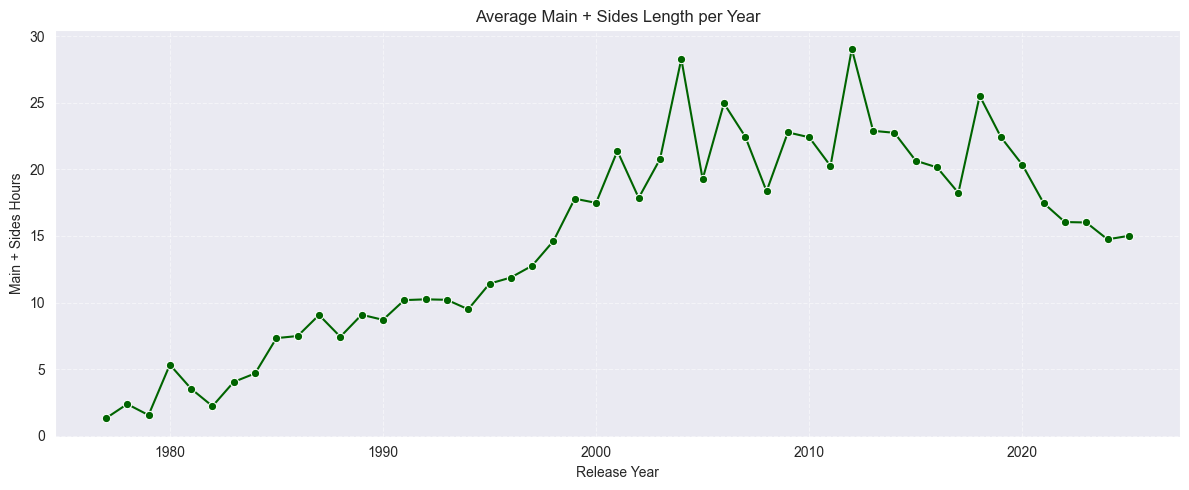

In [47]:
main_plus = df_filtered[df_filtered['release_year'].isin(valid_years)].groupby('release_year')['main_plus_sides'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=main_plus.index, y=main_plus.values, marker='o', color='darkgreen')
plt.title('Average Main + Sides Length per Year')
plt.xlabel('Release Year')
plt.ylabel('Main + Sides Hours')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

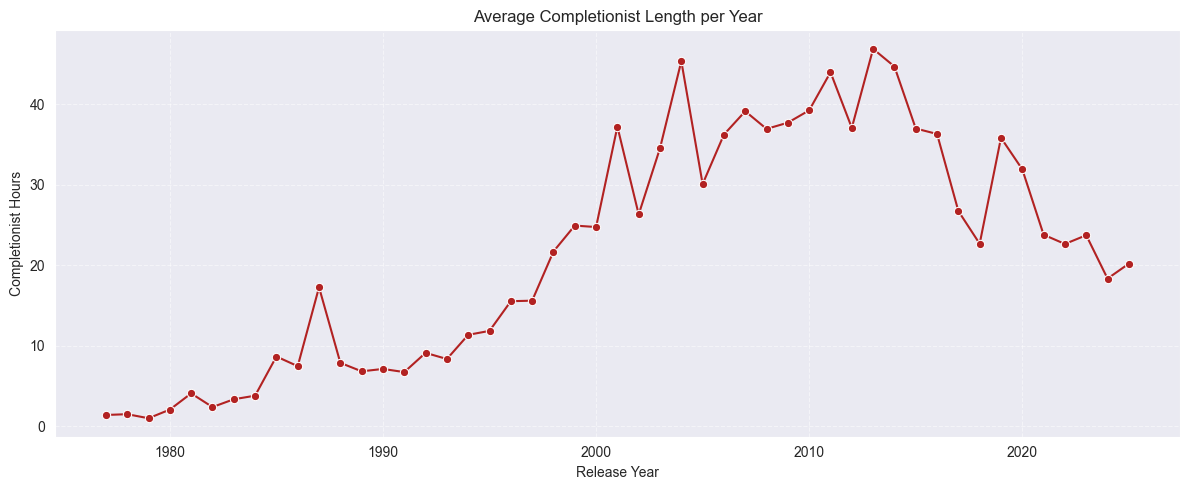

In [48]:
completionist = df_filtered[df_filtered['release_year'].isin(valid_years)].groupby('release_year')['completionist'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=completionist.index, y=completionist.values, marker='o', color='firebrick')
plt.title('Average Completionist Length per Year')
plt.xlabel('Release Year')
plt.ylabel('Completionist Hours')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()